---
# Project 2 - Image Recognition
---

# 1) Processing the Data

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
label_name = {
    0:'airplane', 1:'automobile', 2:'bird',
    3:'cat', 4:'deer', 5:'dog', 6:'frog',
    7:'horse', 8:'ship', 9:'truck'
}

In [ ]:
(train_img, train_labels), (val_img, val_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Show Example of Images

Text(0.5, 0.98, 'Training Set')

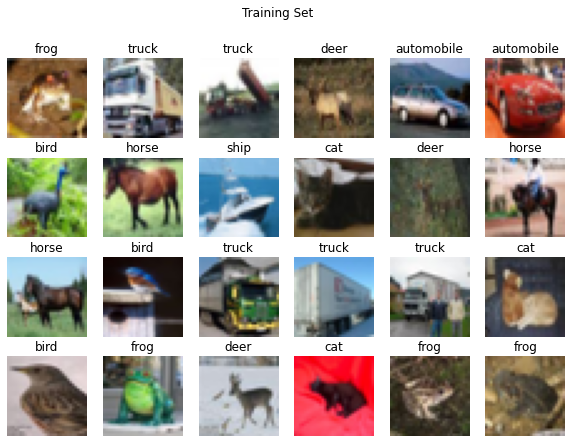

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
for i in range(24):
  plt.subplot(4, 6, i+1)
  plt.axis('Off')
  plt.imshow(train_img[i,:,:,:])
  plt.title(label_name[train_labels[i][0]])
plt.suptitle('Training Set')

Text(0.5, 0.98, 'Validation Set')

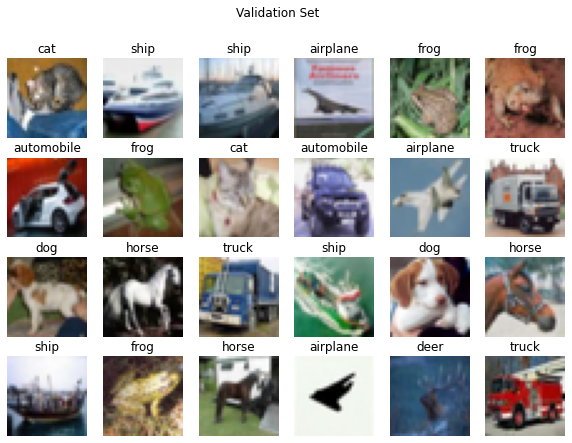

In [ ]:
plt.figure(figsize=(10,7))
for i in range(24):
  plt.subplot(4, 6, i+1)
  plt.axis('Off')
  plt.imshow(val_img[i,:,:,:])
  plt.title(label_name[val_labels[i][0]])
plt.suptitle('Validation Set')

In [ ]:
print(train_img.shape, val_img.shape)
print(train_labels.shape, val_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


# 2) Modelling CNN

### Transform Label Vector to Binary Matrix

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [ ]:
print(train_img.shape, val_img.shape)
print(train_labels.shape, val_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


### Preparing Pixel Data

In [ ]:
# convert from integers to floats
train_img = train_img.astype('float32')
val_img = val_img.astype('float32')

# normalize to range 0-1
train_img = train_img / 255.0
val_img = val_img / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
model.summary()
history = model.fit(train_img, train_labels,
                    steps_per_epoch=200,
                    batch_size=64,
                    validation_data=(val_img,val_labels),
                    validation_steps=8,
                    epochs=50)
model.evaluate(val_img, val_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

[0.11623552441596985, 0.7613999843597412]

# 3) Upload Images for Prediction

Saving cat2.jpg to cat2.jpg
Saving frog.jpg to frog.jpg
Saving truck.jpg to truck.jpg
Saving cat1.jpg to cat1.jpg
Saving horse.jpg to horse.jpg
Saving airplane.jpg to airplane.jpg
Saving truck_from_training_set.png to truck_from_training_set.png


<Figure size 432x288 with 0 Axes>

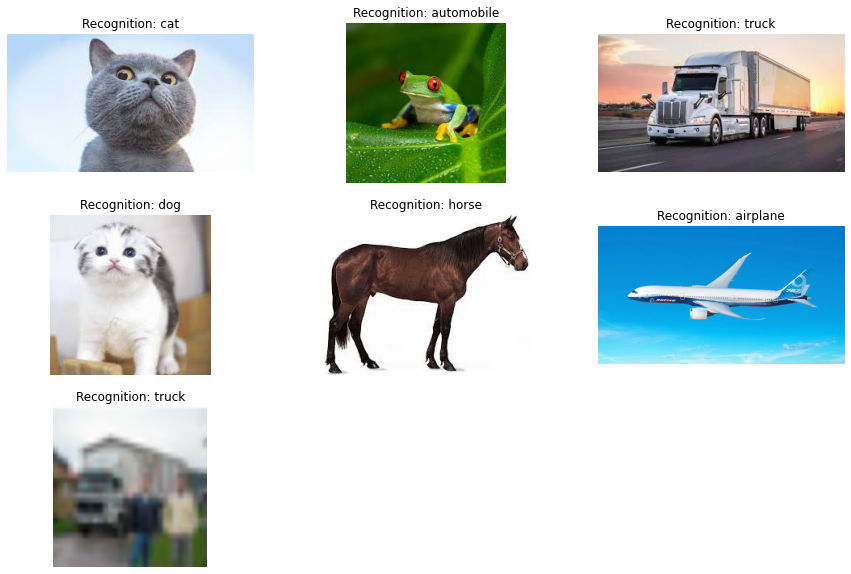

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import os

uploaded = files.upload()

i = 0
plt.figure(figsize=(15,10))

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images)

  if i < 9 :
    plt.subplot(3, 3, i+1)
    plt.imshow(image.load_img(path))
    plt.axis('Off')
    plt.title('Recognition: ' + label_name[int(classes[0])])
  else :
    plt.figure()
    plt.imshow(image.load_img(path))
    plt.axis('Off')
    plt.title('Recognition: ' + label_name[int(classes[0])])

  os.remove(path)
  i += 1

In [ ]:
os.listdir()

['.config', 'sample_data']

# 4) Diagnostic Learning Curves

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


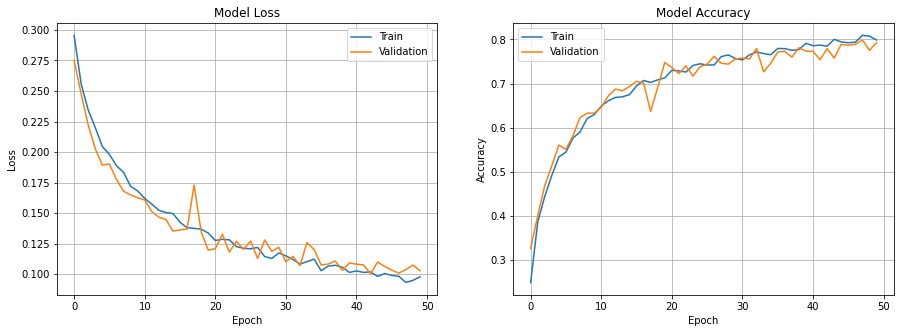

In [ ]:
import matplotlib.pyplot as plt

fig, [ax1,ax2] = plt.subplots(1, 2, sharex=True, figsize=(15,5))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='best')
ax1.grid()

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='best')
ax2.grid()